In [35]:
import cv2
import numpy as np
 
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
# cap = cv2.VideoCapture('chaplin.mp4')
cap = cv2.VideoCapture(0)

# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()

  if ret == True:
    # Display the resulting frame
    cv2.imwrite("NewImage2.jpg",frame)
    cv2.imshow('Frame',frame)
    # Press Q on keyboard to  exit
#     if cv2.waitKey(25) & 0xFF == ord('q'):
    break
  # Break the loop
#   else: 
#     break

# When everything done, release the video capture object
cap.release() 

# Closes all the frames
cv2.destroyAllWindows()

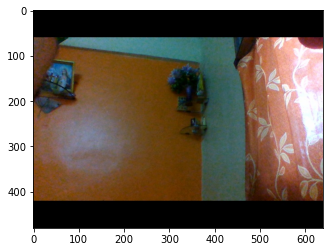

In [11]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('C:\\Users\\Nevets\\pythonFolder\\Untitled Folder\\newImage3.jpg')#,cv2.COLOR_BGR2RGB)
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])

plt.imshow(img)
plt.show()


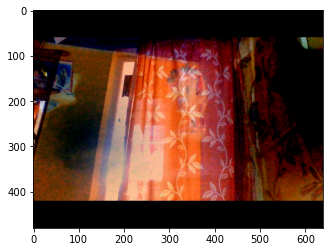

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
    
cap = cv2.VideoCapture(0)

if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
frame1 = cv2.imread('C:\\Users\\Nevets\\pythonFolder\\Untitled Folder\\newImage3.jpg')#,cv2.COLOR_BGR2RGB)
b,g,r = cv2.split(frame1)
frame1 = cv2.merge([r,g,b])
while(cap.isOpened()):
  ret, frame2 = cap.read()
  
  if ret == True:
    frame3 = cv2.subtract(frame1,frame2)

    
    plt.imshow(frame3)
    plt.show()
#     cv2.imshow('Frame',frame3)
    break

cap.release() 

cv2.destroyAllWindows()

In [24]:
# Python program to implement 
# Webcam Motion Detector 

# importing OpenCV, time and Pandas library 
import cv2, time, pandas 
# importing datetime class from datetime library 
from datetime import datetime 

# Assigning our static_back to None 
static_back = None

# List when any moving object appear 
motion_list = [ None, None ] 

# Time of movement 
time = [] 

# Initializing DataFrame, one column is start 
# time and other column is end time 
df = pandas.DataFrame(columns = ["Start", "End"]) 

# Capturing video 
video = cv2.VideoCapture(0) 

# Infinite while loop to treat stack of image as video 
# Reading frame(image) from video 
check, frame = video.read()

# Converting color image to gray_scale image 
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
# Converting gray scale image to GaussianBlur 
# so that change can be find easily 
gray = cv2.GaussianBlur(gray, (21, 21), 0) 
while True: 
    
    
    # In first iteration we assign the value 
    # of static_back to our first frame 
#     if static_back is None: 
    static_back = gray 
#         continue
     
    check, frame = video.read()
    # Initializing motion = 0(no motion) 
    motion = 0
    # Converting color image to gray_scale image 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
    # Converting gray scale image to GaussianBlur 
    # so that change can be find easily 
    gray = cv2.GaussianBlur(gray, (21, 21), 0) 


    # Difference between static background 
    # and current frame(which is GaussianBlur) 
    diff_frame = cv2.absdiff(static_back, gray) 
    # If change in between static background and 
    # current frame is greater than 30 it will show white color(255) 
    thresh_frame = cv2.threshold(diff_frame, 5, 255, cv2.THRESH_BINARY)[1] 
    thresh_frame = cv2.dilate(thresh_frame, None, iterations = 2) 
    # Finding contour of moving object 
    cnts,_ = cv2.findContours(thresh_frame.copy(), 
                    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 

    for contour in cnts: 
        if cv2.contourArea(contour) < 10000: 
            continue
        motion = 1

        (x, y, w, h) = cv2.boundingRect(contour) 
        # making green rectangle arround the moving object 
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3) 
        
    # Appending status of motion 
    motion_list.append(motion) 
    motion_list = motion_list[-2:] 

    # Appending Start time of motion 
    if motion_list[-1] == 1 and motion_list[-2] == 0: 
        time.append(datetime.now()) 
    # Appending End time of motion 
    if motion_list[-1] == 0 and motion_list[-2] == 1: 
        time.append(datetime.now()) 
    
    # Displaying image in gray_scale 
    cv2.imshow("Gray Frame", gray) 
    # Displaying the difference in currentframe to 
    # the staticframe(very first_frame) 
    cv2.imshow("Difference Frame", diff_frame) 

    # Displaying the black and white image in which if 
    # intensity difference greater than 30 it will appear white 
    cv2.imshow("Threshold Frame", thresh_frame) 
    # Displaying color frame with contour of motion of object 
    cv2.imshow("Color Frame", frame)
    
    key = cv2.waitKey(1) 
    # if q entered whole process will stop 
    if key == ord('q'): 
        # if something is movingthen it append the end time of movement 
        if motion == 1: 
            time.append(datetime.now()) 
        break

# Appending time of motion in DataFrame 
for i in range(0, len(time), 2): 
	df = df.append({"Start":time[i], "End":time[i + 1]}, ignore_index = True) 

# Creating a CSV file in which time of movements will be saved 
df.to_csv("Time_of_movements.csv") 

video.release() 

# Destroying all the windows 
cv2.destroyAllWindows() 


In [70]:
import cv2
import numpy as np

img3 = cv2.imread('C:\\Users\\Nevets\\pythonFolder\\Untitled Folder\\newImage1.jpg')
img1 = cv2.imread('C:\\Users\\Nevets\\pythonFolder\\Untitled Folder\\newImage1.jpg')#cv2.COLOR_BGR2GRAY)
img2 = cv2.imread('C:\\Users\\Nevets\\pythonFolder\\Untitled Folder\\newImage2.jpg')#cv2.COLOR_BGR2GRAY)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img1 = cv2.GaussianBlur(img1,(21,21),0)
img2 = cv2.GaussianBlur(img2,(21,21),0)
img = cv2.subtract(img2,img1)
thresh_frame = cv2.threshold(img, 5, 255, cv2.THRESH_BINARY)[1] 
thresh_frame = cv2.dilate(thresh_frame, None, iterations = 2) 
cnts,_ = cv2.findContours(thresh_frame.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in cnts:
    if cv2.contourArea(contour) < 10000:
        continue
    # add a rectangle contour
#     (x, y, w, h) = cv2.boundingRect(contour) 
#     rect = cv2.minAreaRect(contour)
#     box = cv2.boxPoints(rect)
#     box = np.int0(box)
#     img3 = cv2.drawContours(img3,[box],0,(0,0,255),2)
    
    #add a polygon border to contour
    epsilon = 0.1*cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    cv2.drawContours(img3,approx,-1,(0,255,0),3)
    # making green rectangle arround the moving object 
    # cv2.cvtColor(thresh_frame,cv2.COLOR_GRAY2BGR)
#     cv2.rectangle(img3, (x, y), (x + w, y + h), (0, 255, 0), 3) 


cv2.imshow('Image1',img3)
# cv2.imshow('Diff',img)
# cv2.imshow('Diff1',img1)
# cv2.imshow('Diff2',img2)
cv2.imshow('Image2',thresh_frame)
cv2.waitKey(0)
cv2.destroyAllWindows()